<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import ipywidgets as widgets
from ipywidgets import interactive

----
# 1D random walk
In this notebook, we create **random walks** in one dimension (along the $x$ axis).

We start from an **initial position** $x_0=0$, and the **successive steps** $i=1,N$ are given as:
$$
x_i = x_{i-1} + r_i \Delta x
$$
with $\Delta x$ the **step size**, and $r_i \in [0,1[$ a **random number**.

We use the `rng.integers` function from `numpy` to 
- first create integer random numbers 1 or 2, 
- then multiplying the result by 2 and substracting 3, 
- we end up with random numbers $r=[-1,1]$. 

In [11]:
rng = np.random.default_rng(seed=42)
walk1D = rng.integers(1,3,100)
print(2*walk1D-3)

[-1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1
  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1
  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1
 -1  1  1 -1]


In [44]:
def random_walk1D(n=1000,dxp=0.05,dxm=0.05,seed=12):
    """
    random walk in 1D
    """
    rng = np.random.default_rng(seed=seed)
    direction = 2*rng.integers(1,3,n) - 3
    x1 = np.array([0])

    plt.figure(figsize=(10,5))
    plt.title('1D random walk')
    plt.xlabel('Iteration no.')
    plt.ylabel('x')
    #plt.ylim([-3,3])
    for i in range(1,n):
        if (direction[i] > 0):
            x1 = np.append(x1,x1[i-1]+direction[i]*dxp)
        else:
            x1 = np.append(x1,x1[i-1]+direction[i]*dxm)

    plt.plot(x1,label='dxp='+str(round(dxp,2))+', dxm='+str(round(dxm,2)))
    plt.legend()
    return

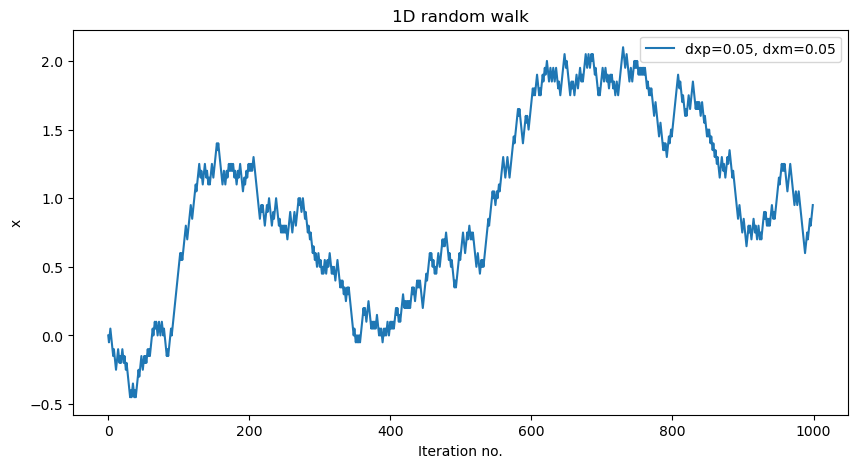

In [45]:
random_walk1D(n=1000)

In [46]:
interactive_plot = interactive(random_walk1D,
                               dxm=widgets.FloatSlider(min=0.02,max=0.08,step=0.01,value=0.01,description='dxm'),
                               dxp=widgets.FloatSlider(min=0.02,max=0.08,step=0.01,value=0.01,description='dxp'),
                               n=widgets.IntSlider(min=100,max=1000,step=100,value=100,description='n'),
                               seed=widgets.IntSlider(min=10,max=100,step=1,value=12,description='seed')
                              )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=1000, min=100, step=100), FloatSlider(value=0.…

----